In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/Shareddrives/DSAIL_CNN학습

/content/drive/Shareddrives/DSAIL_CNN학습


In [ ]:
!unzip -qq "/content/drive/Shareddrives/DSAIL_CNN학습/archive (1).zip"

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
base_dir = os.path.join("/content/drive/Shareddrives/DSAIL_CNN학습/OCT2017 ")
print('Base directory --> ', os.listdir(base_dir))

Base directory -->  ['test', 'train', 'val']


In [ ]:
train_dir = os.path.join(base_dir + "/train/")
print("Train Directory --> ", os.listdir(train_dir))

validation_dir = os.path.join(base_dir + "/val/")
print("Validation Directory --> ", os.listdir(validation_dir))

test_dir = os.path.join(base_dir + "/test/")
print("Test Directory --> ", os.listdir(test_dir))

Train Directory -->  ['CNV', 'DME', 'DRUSEN', 'NORMAL']
Validation Directory -->  ['DRUSEN', 'NORMAL', 'CNV', 'DME']
Test Directory -->  ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
train_dir

'/content/drive/Shareddrives/DSAIL_CNN학습/OCT2017 /train/'

In [ ]:
print("Train Directory --> ", os.listdir(train_dir))

Train Directory -->  ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
#label 지정하기 

label_names = sorted(set(item for item in os.listdir(test_dir)))
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [ ]:
train_dir

'/content/drive/Shareddrives/DSAIL_CNN학습/OCT2017 /train/'

In [ ]:
glob(train_dir+'/*')

In [ ]:
for i in glob(train_dir+'/*'):
  print(glob(i+'/*')[:10])
  break
  

In [ ]:
label_to_index[glob(train_dir+'/*/*')[-2].split('/')[-2]]

2

In [ ]:
#데이터 구축하기
from glob import glob 
import pathlib
train_image=[]
test_image =[]
val_image=[]
train_label=[]
test_label =[]
val_label=[]

for path in glob(train_dir+'/*/*'):
  train_image.append(path)
  #print(pathlib.Path(path).parent.name)
  train_label.append(label_to_index[path.split('/')[-2]])


for path in glob(test_dir+'/*/*'):
  test_image.append(path)
  #print(pathlib.Path(path).parent.name)
  test_label.append(label_to_index[path.split('/')[-2]])

In [ ]:
train_image[:4]

['/content/drive/Shareddrives/DSAIL_CNN학습/OCT2017 /train/CNV/CNV-9911627-117.jpeg',
 '/content/drive/Shareddrives/DSAIL_CNN학습/OCT2017 /train/CNV/CNV-9910852-4.jpeg',
 '/content/drive/Shareddrives/DSAIL_CNN학습/OCT2017 /train/CNV/CNV-9890872-5.jpeg',
 '/content/drive/Shareddrives/DSAIL_CNN학습/OCT2017 /train/CNV/CNV-9911627-53.jpeg']

In [ ]:
train_label[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
print('train image 개수',len(train_image))
print('test image 개수',len(test_image))

train image 개수 53707
test image 개수 968


In [ ]:
print('train image 개수',len(train_label))
print('test image 개수',len(test_label))

train image 개수 53707
test image 개수 968


In [ ]:
train_image[0]

'/content/drive/Shareddrives/DSAIL_CNN학습/OCT2017 /train/CNV/CNV-9911627-117.jpeg'

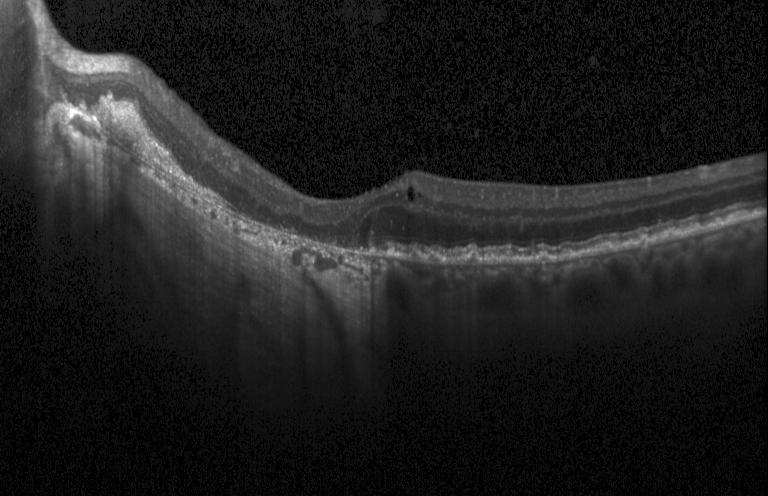

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

Image.open(train_image[0])

In [ ]:
X = []
from keras.preprocessing import image
from tqdm import tqdm

for imag in tqdm(train_image):
  img = image.load_img(imag, target_size=(64, 64))#, color_mode='grayscale')
            #print(type(img))
  img = image.img_to_array(img)
            #print(type(img))
  img = img/255.0
  X.append(img)
#

# np.array(Image.open(train_image[0]))   
# for문으로 image한개씩 읽어서 numpy 배열로 저장 
# keras는 GPU

100%|██████████| 53707/53707 [2:34:03<00:00,  5.81it/s] 


In [ ]:
X = np.array(X)
print(X.shape)

(53707, 64, 64, 3)


In [ ]:
np.save('train_image_53707', X)

numpy로 데이터 저장후 불러오기

In [ ]:
data = np.load('/content/drive/Shareddrives/DSAIL_CNN학습/train_image_53707.npy') 

In [ ]:
data.shape

(53707, 64, 64, 3)

In [ ]:
len(train_label)

53707

In [ ]:
y= np.array(train_label)

In [ ]:
y.shape

(53707,)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.30, random_state=42, shuffle=True)

In [ ]:
X_train[:10]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.04705882, 0.04705882, 0.04705882],
         [0.05490196, 0.05490196, 0.05490196]

In [ ]:
y_train[:10]

array([2, 2, 0, 1, 2, 0, 1, 0, 1, 0])

### VGGNET 모델 구현


In [ ]:
input = Input(shape =(64,64,3)) #256,256 

In [ ]:
# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [ ]:
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [ ]:
# 3rd Conv block  
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [ ]:
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [ ]:
# Fully connected layers  
x = Flatten()(x) 
x = Dense(units = 4096, activation ='relu')(x) 
x = Dense(units = 4096, activation ='relu')(x) 
output = Dense(units = 4, activation ='softmax')(x)

In [ ]:
# creating the model

model = Model (inputs=input, outputs =output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       147584    
                                                             

In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 4)
y_testHot = to_categorical(y_test, num_classes = 4)

In [ ]:
y_testHot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train = np.array(X_train)
x_test = np.array(X_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(37594,)
(16113,)


In [ ]:
model.fit(x_train, y_trainHot, epochs=3)

### transfer

In [ ]:
history_vgg = model_vgg.fit(
    train_generator,
    steps_per_epoch = (83484/500),
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = (32/16),
    max_queue_size=100,
    workers = 4 ,
    use_multiprocessing=True,
    verbose = 1)

NameError: ignored

In [ ]:
# vgg 19하는데 fit이 안된다....딥알못이라 모르겠어....

vgg19 = tf.keras.applications.VGG19(
    include_top = False, 
    weights = 'imagenet', 
    input_tensor = None,
    input_shape = (64,64,3), 
    pooling = None, 
    classes = 3
)


x = vgg19.output
x = tf.keras.layers.Dense(512,activation="relu")(x)
x = tf.keras.layers.Dense(256,activation="relu")(x)
out = tf.keras.layers.Dense(3,activation="softmax")(x)

In [ ]:
vgg19.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
history_vgg = vgg19.fit(
    x = X_train,
    y = y_train,
    epochs = 15,
    workers = 4)

In [ ]:
custom_vgg.fit(x = X_train,
               y = y_train,
               epochs = 100)

#Pretrain VGG16 - epoch3

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

vgg16 = tf.keras.applications.VGG16(
    include_top = False, 
    weights = 'imagenet', 
    input_tensor = None,
    input_shape = (64,64,3), 
    pooling = None, 
    classes = 3
)
'''
=.add(layers.Flatten())
vgg16.add(layers.Dense(32, activation='relu'))
vgg16.add(layers.Dropout(0.3))
vgg16.add(layers.Dense(16, activation='relu'))
vgg16.add(layers.Dense(3, activation='sigmoid'))
'''


new_model = Sequential()
new_model.add(vgg16)
new_model.add(Flatten())
new_model.add(Dense(32,activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(16,activation='relu'))
new_model.add(Dense(3,activation='sigmoid'))

#layer를 얼려야 빨리된다.
#끝에 세개정도만 풀고 한다. 


In [ ]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_23 (Dense)            (None, 32)                65568     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 3)                 51        
                                                                 
Total params: 14,780,835
Trainable params: 14,780,835


In [ ]:
new_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train.shape

(37594, 64, 64, 3)

In [ ]:
y_train.shape

(37594,)

In [ ]:
np.unique(y_train)

array([0, 1, 2])

In [ ]:
new_model.fit(
    x = X_train,
    y = y_train,
    epochs=3,
    validation_split=0.2,
    batch_size=64
)

In [ ]:
new_model.evaluate(X_test,y_test)

#CNN 모델 

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(64,(3,3), activation='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 32)                8

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(
    x = X_train,
    y = y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=64
)

Epoch 1/10
470/470 [==============================] - 333s 708ms/step - loss: 0.6226 - accuracy: 0.7468 - val_loss: 0.4470 - val_accuracy: 0.8185
Epoch 2/10
470/470 [==============================] - 332s 707ms/step - loss: 0.4303 - accuracy: 0.8335 - val_loss: 0.3740 - val_accuracy: 0.8554
Epoch 3/10
470/470 [==============================] - 332s 707ms/step - loss: 0.3460 - accuracy: 0.8661 - val_loss: 0.3184 - val_accuracy: 0.8804
Epoch 4/10
470/470 [==============================] - 332s 706ms/step - loss: 0.2952 - accuracy: 0.8880 - val_loss: 0.2980 - val_accuracy: 0.8888
Epoch 5/10
470/470 [==============================] - 332s 706ms/step - loss: 0.2501 - accuracy: 0.9067 - val_loss: 0.2742 - val_accuracy: 0.9009
Epoch 6/10
470/470 [==============================] - 332s 706ms/step - loss: 0.2040 - accuracy: 0.9218 - val_loss: 0.2503 - val_accuracy: 0.9097
Epoch 7/10
470/470 [==============================] - 332s 707ms/step - loss: 0.1697 - accuracy: 0.9352 - val_loss: 0.2712 -

In [ ]:
model.evaluate(X_test,y_test)
#model.predict(X_test) 
#np.argmax() -> label로
#classification_report

504/504 [==============================] - 49s 97ms/step - loss: 0.2520 - accuracy: 0.9198


[0.25204285979270935, 0.9197542071342468]

In [ ]:
cd /content/drive/Shareddrives/DSAIL_CNN학습

/content/drive/Shareddrives/DSAIL_CNN학습


In [ ]:
from keras.models import load_model

model.save('oct_cnn_model.h5')

In [ ]:
model = load_model('oct_cnn_model.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 32)                8

In [ ]:
x_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report 

print(classification_report(np.argmax(x_pred,axis=1),y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11139
           1       0.89      0.89      0.89      3370
           2       0.76      0.72      0.74      1604

    accuracy                           0.92     16113
   macro avg       0.87      0.86      0.86     16113
weighted avg       0.92      0.92      0.92     16113



In [ ]:
#normal , pretrain
# report작성할때 풀어서 작성

# 안과 질환 OCT
# 데이터 참고 kaggle
# 데이터 질병 설명
# cnn network를 이용하여 푼다
# metod 훈련 어떻게했고, layer 몇층 쌓았고
# result conclusion 결과 질병 
# 논문 형식으로 
# OCT이미지랑 cnn figure 이미지 구하기 
